In [1]:
import numpy as np
import pandas as pd

parkinson_set = pd.read_csv("parkinsons.data")
parkinson_set.tail()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
190           0.00003   0.00263   0.00259     0.00790       0.04087  ...   
191           0.00003   0.00331   0.00292     0.00994       0.02751  ...   
192           0.00008   0.00624   0.00564     0.01873       0.02308  ...   
193           0.00004   0.00370   0.00390     0.01109       0.02296  ...   
194           0.00003   0.00295   0.00317     0.00885       0.01884  ...   

     Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
190      0.07008  0.02764  19.517       0  0.448439  0.657899 -6.538586   
191      0.04812  0.01810  19.147       0  0.431674  0.683244 -6.195325   
192      0.03804  0.10715  17.883       0  0.407567  0.655683 -6.787197   
193      0.03794  0.07223  19.020       0  0.451221  0.643956 -6.744577   
194      0.03078  0.04398  21.209       0  0.462803  0.664357 -5.724056   

      spread2        D2       PPE  
190  0.121952  2.657476  0.133050  
191  0.129303  2.784312  0.168895  
192  0.158453  2.679772  0.131728  
193  0.207454  2.138608  0.123306  
194  0.190667  2.555477  0.148569  

[5 rows x 24 columns]

In [2]:
parkinson_set.describe()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000020    0.001660    0.001860    0.004985      0.016505   
50%            0.000030    0.002500    0.002690    0.007490      0.022970   
75%            0.000060    0.003835    0.003955    0.011505      0.037885   
max            0.000260    0.021440    0.019580    0.064330      0.119080   

       MDVP:Shimmer(dB)  ...  Shimmer:DDA         NHR         HNR      status  \
count        195.000000  ...   195.000000  195.000000  195.000000  195.000000   
mean           0.282251  ...     0.046993    0.024847   21.885974    0.753846   
std            0.194877  ...     0.030459    0.040418    4.425764    0.431878   
min            0.085000  ...     0.013640    0.000650    8.441000    0.000000   
25%            0.148500  ...     0.024735    0.005925   19.198000    1.000000   
50%            0.221000  ...     0.038360    0.011660   22.085000    1.000000   
75%            0.350000  ...     0.060795    0.025640   25.075500    1.000000   
max            1.302000  ...     0.169420    0.314820   33.047000    1.000000   

             RPDE         DFA     spread1     spread2          D2         PPE  
count  195.000000  195.000000  195.000000  195.000000  195.000000  195.000000  
mean     0.498536    0.718099   -5.684397    0.226510    2.381826    0.206552  
std      0.103942    0.055336    1.090208    0.083406    0.382799    0.090119  
min      0.256570    0.574282   -7.964984    0.006274    1.423287    0.044539  
25%      0.421306    0.674758   -6.450096    0.174351    2.099125    0.137451  
50%      0.495954    0.722254   -5.720868    0.218885    2.361532    0.194052  
75%      0.587562    0.761881   -5.046192    0.279234    2.636456    0.252980  
max      0.685151    0.825288   -2.434031    0.450493    3.671155    0.527367  

[8 rows x 23 columns]

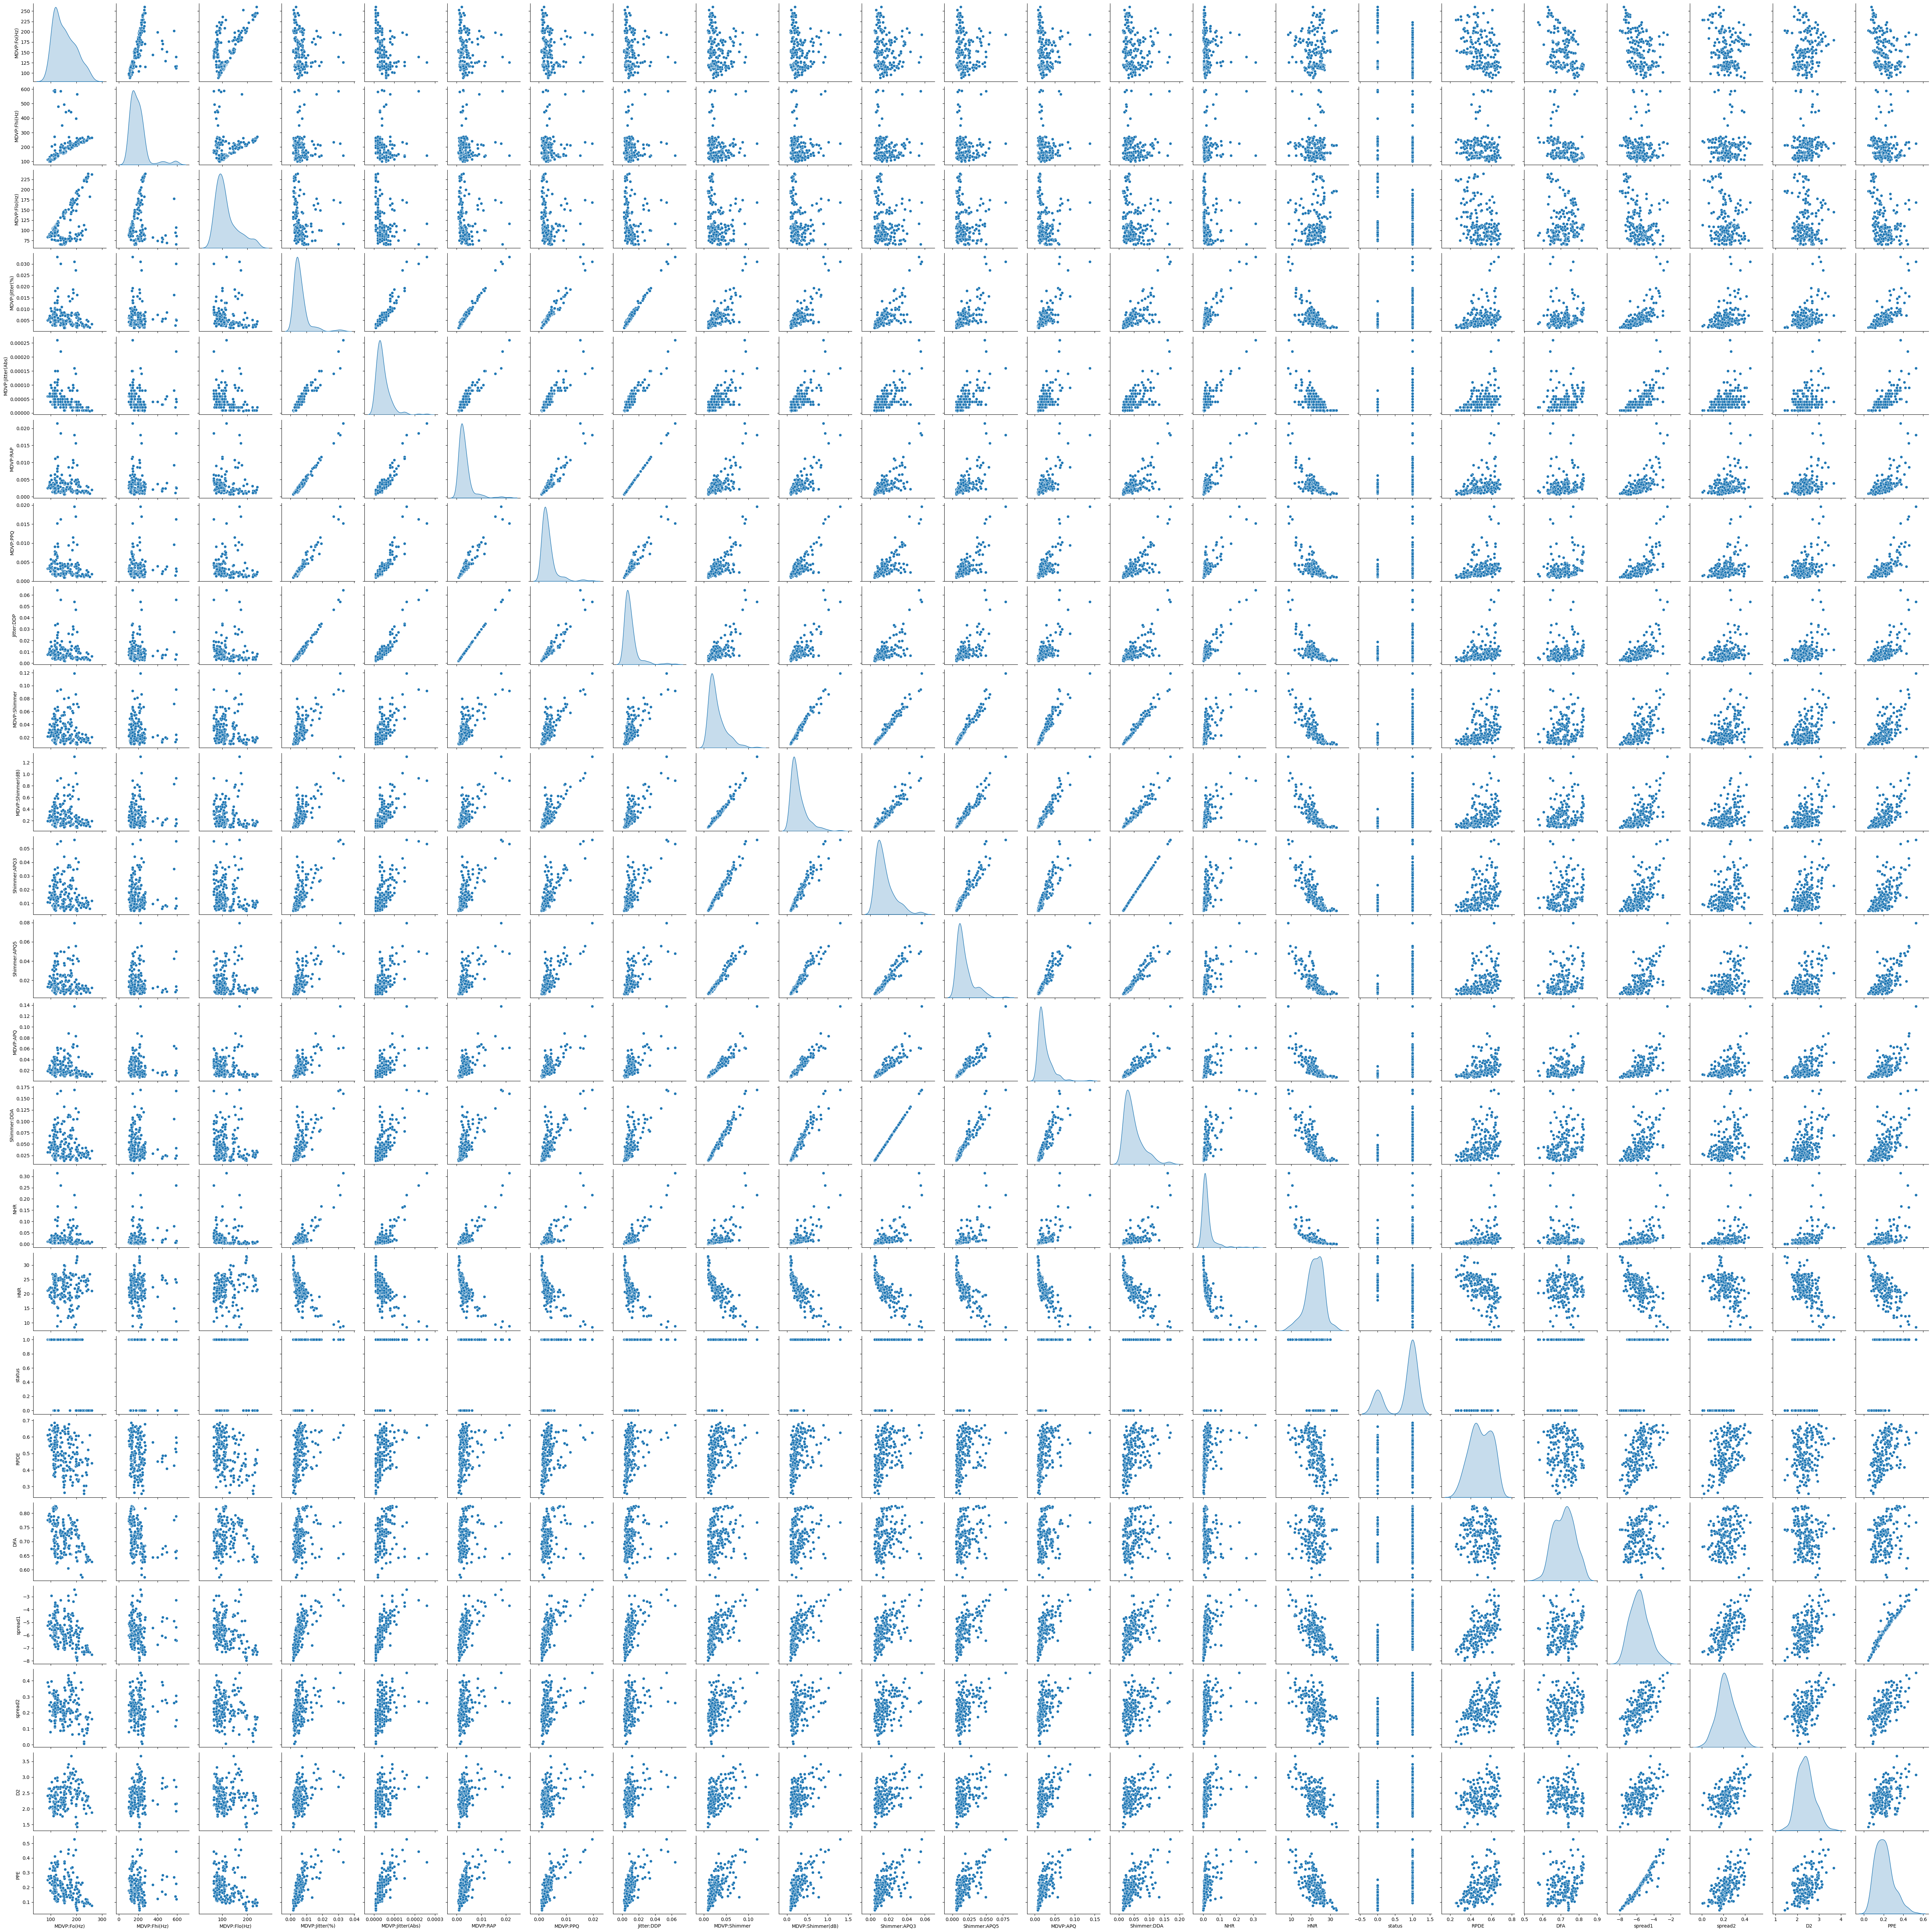

In [3]:
import seaborn as sb

sb.pairplot(parkinson_set, diag_kind="kde")

In [3]:
#Data preprocessing
parkinson_set = parkinson_set.drop('name', axis=1)
parkinson_target = parkinson_set["status"]
parkinson_data = parkinson_set.drop('status', axis=1)

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
parkinson_scaled = scaler.fit_transform(parkinson_data)

In [7]:
parkinson_scaled.shape

(195, 22)

In [8]:
parkinson_target.shape

(195,)

In [9]:
print("First patient in database")
print(parkinson_scaled[1,:])
print('---Mean---')
print(parkinson_scaled.mean(axis=0))
print('--std---')
print(parkinson_scaled.std(axis=0))

First patient in database
[-0.77097169 -0.53097409 -0.05772056  0.71541825  1.03767418  0.45389169
  1.27680862  0.45268371  1.68173116  1.7684643   1.54791153  2.27650439
  1.15945391  1.54825419 -0.13784252 -0.63450828 -0.38752443  1.83756192
  1.47985265  1.31118546  0.27507712  1.80360503]
---Mean---
[ 2.96059473e-17 -2.27738056e-16  1.04759506e-16  1.82190445e-17
  9.10952225e-17 -1.27533312e-16  6.37666558e-17  7.28761780e-17
  2.36847579e-16 -1.63971401e-16  1.06467541e-16  2.62468110e-16
 -6.83214169e-17 -1.69380179e-16  1.09314267e-16  8.19857003e-16
 -1.09314267e-16  6.55885602e-16  1.20245694e-15 -1.13869028e-16
 -5.92118946e-16  1.36642834e-17]
--std---
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [5]:
from sklearn.model_selection import train_test_split
#----
#scaled data
parkinson_train_data, parkinson_test_data, \
parkinson_train_target, parkinson_test_target = \
train_test_split(parkinson_scaled, parkinson_target, test_size=0.2)
print("Training dataset:")
print("patients_train_data:", parkinson_train_data.shape)
print("patients_train_target:", parkinson_train_target.shape)
print("Testing dataset:")
print("patients_test_data:", parkinson_test_data.shape)
print("patients_test_target:", parkinson_test_target.shape)

Training dataset:
patients_train_data: (156, 22)
patients_train_target: (156,)
Testing dataset:
patients_test_data: (39, 22)
patients_test_target: (39,)


In [66]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(parkinson_train_data, parkinson_train_target)

LogisticRegression()

In [67]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(parkinson_test_target, logistic_regression.predict(parkinson_test_data))
print("Model accuracy is {0:0.2f}".format(acc))

Model accuracy is 0.77


In [68]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(parkinson_test_target, logistic_regression.predict(parkinson_test_data))
print(conf_matrix)

[[ 7  3]
 [ 6 23]]


In [69]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogisticRegression(), parkinson_scaled, parkinson_target, cv=4)
print(scores)

[0.91836735 0.87755102 0.69387755 0.75      ]


In [70]:
#Further testing
from sklearn.preprocessing import PolynomialFeatures

pt = PolynomialFeatures(2, )

In [71]:
parkinson_train_poly = pt.fit_transform(parkinson_train_data)
parkinson_test_poly = pt.fit_transform(parkinson_test_data)
print(parkinson_train_poly.shape)

(156, 276)


In [72]:
poly_regression = LogisticRegression()
poly_regression.fit(parkinson_train_poly, parkinson_train_target)

LogisticRegression()

In [73]:
acc_p = accuracy_score(parkinson_test_target, poly_regression.predict(parkinson_test_poly))
print("Model accuracy with poly features is {0:0.2f}".format(acc_p))

Model accuracy with poly features is 0.90


In [74]:
conf_matrix = confusion_matrix(parkinson_test_target, poly_regression.predict(parkinson_test_poly))
print(conf_matrix)

[[10  0]
 [ 4 25]]


In [75]:
parkinson_scaled_poly = pt.fit_transform(parkinson_scaled)

In [76]:
scores = cross_val_score(LogisticRegression(), parkinson_scaled_poly, parkinson_target, cv=4)
print(scores)

[0.89795918 0.7755102  0.85714286 0.77083333]


In [77]:
from sklearn.feature_selection import RFE


for i in range(10, 140, 20):
    sel_ = RFE(estimator=LogisticRegression(), n_features_to_select=i)
    sel_.fit(parkinson_train_poly, parkinson_train_target)
    print("for i = ", i, ", score = ", accuracy_score(parkinson_test_target, sel_.predict(parkinson_test_poly)))

for i =  10 , score =  0.8717948717948718
for i =  30 , score =  0.8717948717948718
for i =  50 , score =  0.8974358974358975
for i =  70 , score =  0.8974358974358975
for i =  90 , score =  0.8974358974358975
for i =  110 , score =  0.8974358974358975
for i =  130 , score =  0.8974358974358975


In [78]:
for i in range(1, 20, 1):
    sel_ = RFE(estimator=LogisticRegression(), n_features_to_select=i)
    sel_.fit(parkinson_train_data, parkinson_train_target)
    print("for i = ", i, ", score = ", accuracy_score(parkinson_test_target, sel_.predict(parkinson_test_data)))

for i =  1 , score =  0.7948717948717948
for i =  2 , score =  0.7435897435897436
for i =  3 , score =  0.7948717948717948
for i =  4 , score =  0.7692307692307693
for i =  5 , score =  0.8205128205128205
for i =  6 , score =  0.8205128205128205
for i =  7 , score =  0.7692307692307693
for i =  8 , score =  0.8461538461538461
for i =  9 , score =  0.7692307692307693
for i =  10 , score =  0.7692307692307693
for i =  11 , score =  0.7692307692307693
for i =  12 , score =  0.7692307692307693
for i =  13 , score =  0.7692307692307693
for i =  14 , score =  0.7948717948717948
for i =  15 , score =  0.7948717948717948
for i =  16 , score =  0.7948717948717948
for i =  17 , score =  0.7948717948717948
for i =  18 , score =  0.7948717948717948
for i =  19 , score =  0.7692307692307693


In [79]:
for i in range(1, 20, 1):
    scores = cross_val_score(RFE(estimator=LogisticRegression(), n_features_to_select=i), parkinson_scaled, parkinson_target, cv=4)
    print(scores)

[0.91836735 0.91836735 0.69387755 0.79166667]
[0.89795918 0.81632653 0.69387755 0.77083333]
[0.89795918 0.85714286 0.65306122 0.79166667]
[0.87755102 0.85714286 0.69387755 0.8125    ]
[0.89795918 0.87755102 0.71428571 0.77083333]
[0.89795918 0.87755102 0.71428571 0.77083333]
[0.91836735 0.87755102 0.71428571 0.75      ]
[0.91836735 0.87755102 0.75510204 0.75      ]
[0.91836735 0.87755102 0.73469388 0.75      ]
[0.91836735 0.87755102 0.73469388 0.75      ]
[0.89795918 0.87755102 0.75510204 0.75      ]
[0.89795918 0.87755102 0.7755102  0.75      ]
[0.89795918 0.87755102 0.7755102  0.75      ]
[0.89795918 0.87755102 0.71428571 0.75      ]
[0.89795918 0.87755102 0.69387755 0.75      ]
[0.89795918 0.87755102 0.69387755 0.75      ]
[0.91836735 0.87755102 0.69387755 0.75      ]
[0.91836735 0.87755102 0.69387755 0.75      ]
[0.91836735 0.87755102 0.69387755 0.75      ]


#Grid search

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
parameters = {'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10]}

logistic_regression = LogisticRegression()

grid_search = GridSearchCV(logistic_regression, parameters)
grid_search.fit(parkinson_train_data, parkinson_train_target)
best_params = grid_search.best_params_
print("Najlepsze parametry: ", best_params)

Najlepsze parametry:  {'C': 0.1, 'penalty': 'l2'}


D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or 'none

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(penalty='l2', C=0.1)
logistic_regression.fit(parkinson_train_data, parkinson_train_target)

acc = accuracy_score(parkinson_test_target, logistic_regression.predict(parkinson_test_data))
print("Model accuracy is {0:0.2f}".format(acc))

conf_matrix = confusion_matrix(parkinson_test_target, logistic_regression.predict(parkinson_test_data))
print(conf_matrix)

scores = cross_val_score(LogisticRegression(penalty='l2', C=0.1), parkinson_scaled, parkinson_target, cv=4)
print(scores)


Model accuracy is 0.85
[[ 6  4]
 [ 2 27]]
[0.93877551 0.87755102 0.73469388 0.75      ]


In [11]:
from sklearn.preprocessing import PolynomialFeatures

pt = PolynomialFeatures(2, )

In [12]:
parkinson_train_poly = pt.fit_transform(parkinson_train_data)
parkinson_test_poly = pt.fit_transform(parkinson_test_data)
print(parkinson_train_poly.shape)

(156, 276)


In [13]:
poly_regression = LogisticRegression(penalty='l2', C=0.1)
poly_regression.fit(parkinson_train_poly, parkinson_train_target)

LogisticRegression(C=0.1)

In [14]:
acc_p = accuracy_score(parkinson_test_target, poly_regression.predict(parkinson_test_poly))
print("Model accuracy with poly features is {0:0.2f}".format(acc_p))

Model accuracy with poly features is 0.95


In [15]:
conf_matrix = confusion_matrix(parkinson_test_target, poly_regression.predict(parkinson_test_poly))
print(conf_matrix)

[[ 8  2]
 [ 0 29]]


In [16]:
parkinson_scaled_poly = pt.fit_transform(parkinson_scaled)

In [17]:
scores = cross_val_score(LogisticRegression(penalty='l2', C=0.1), parkinson_scaled_poly, parkinson_target, cv=4)
print(scores)

[0.91836735 0.79591837 0.83673469 0.75      ]


In [18]:
from sklearn.feature_selection import RFE


for i in range(10, 140, 20):
    sel_ = RFE(estimator=LogisticRegression(penalty='l2', C=0.1), n_features_to_select=i)
    sel_.fit(parkinson_train_poly, parkinson_train_target)
    print("for i = ", i, ", score = ", accuracy_score(parkinson_test_target, sel_.predict(parkinson_test_poly)))

for i =  10 , score =  0.8974358974358975
for i =  30 , score =  0.8974358974358975
for i =  50 , score =  0.9230769230769231
for i =  70 , score =  0.9230769230769231
for i =  90 , score =  0.9230769230769231
for i =  110 , score =  0.9230769230769231
for i =  130 , score =  0.9487179487179487


In [19]:
for i in range(1, 20, 1):
    sel_ = RFE(estimator=LogisticRegression(penalty='l2', C=0.1), n_features_to_select=i)
    sel_.fit(parkinson_train_data, parkinson_train_target)
    print("for i = ", i, ", score = ", accuracy_score(parkinson_test_target, sel_.predict(parkinson_test_data)))

for i =  1 , score =  0.8461538461538461
for i =  2 , score =  0.8461538461538461
for i =  3 , score =  0.8461538461538461
for i =  4 , score =  0.8461538461538461
for i =  5 , score =  0.8461538461538461
for i =  6 , score =  0.8461538461538461
for i =  7 , score =  0.8461538461538461
for i =  8 , score =  0.8461538461538461
for i =  9 , score =  0.8461538461538461
for i =  10 , score =  0.8461538461538461
for i =  11 , score =  0.8461538461538461
for i =  12 , score =  0.8461538461538461
for i =  13 , score =  0.8461538461538461
for i =  14 , score =  0.8717948717948718
for i =  15 , score =  0.8717948717948718
for i =  16 , score =  0.8461538461538461
for i =  17 , score =  0.8461538461538461
for i =  18 , score =  0.8461538461538461
for i =  19 , score =  0.8461538461538461


In [20]:
for i in range(1, 20, 1):
    scores = cross_val_score(RFE(estimator=LogisticRegression(penalty='l2', C=0.1), n_features_to_select=i), parkinson_scaled, parkinson_target, cv=4)
    print(scores)

[0.91836735 0.83673469 0.75510204 0.75      ]
[0.93877551 0.87755102 0.69387755 0.75      ]
[0.95918367 0.87755102 0.69387755 0.75      ]
[0.95918367 0.87755102 0.71428571 0.75      ]
[0.95918367 0.87755102 0.71428571 0.75      ]
[0.95918367 0.87755102 0.69387755 0.75      ]
[0.95918367 0.87755102 0.71428571 0.75      ]
[0.95918367 0.87755102 0.73469388 0.75      ]
[0.95918367 0.87755102 0.73469388 0.75      ]
[0.95918367 0.87755102 0.73469388 0.75      ]
[0.93877551 0.87755102 0.73469388 0.75      ]
[0.93877551 0.87755102 0.73469388 0.75      ]
[0.91836735 0.87755102 0.73469388 0.75      ]
[0.91836735 0.87755102 0.73469388 0.75      ]
[0.93877551 0.87755102 0.73469388 0.75      ]
[0.95918367 0.87755102 0.73469388 0.75      ]
[0.93877551 0.87755102 0.73469388 0.75      ]
[0.95918367 0.87755102 0.73469388 0.75      ]
[0.95918367 0.87755102 0.73469388 0.75      ]
